In [1]:
# Import for fetching data
import requests  
import json  

# Import for time-based operations
import time  
from datetime import datetime  

# Import for data processing
import pandas as pd  
import numpy as np  

# Import for visualization (when building the dashboard)
import matplotlib.pyplot as plt  
import seaborn as sns  


In [2]:
url = "http://localhost:1880/download"

try:
    while True:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            print("\n✅ Smart Energy Data:\n", data)  # Print real-time data
        else:
            print("❌ Error fetching data:", response.status_code)

        time.sleep(5)  # after every 5 seconds

except KeyboardInterrupt:
    print("\n⏹️ Script stopped by user.")


✅ Smart Energy Data:
 [{'_id': '67ead4cd7dc56e07d0ca785b', 'payload': {'timestamp': '2025-03-31T17:45:49.950Z', 'energy_consumption_kWh': 180.16, 'voltage': 67.38}, '_msgid': 'dab1cf1943f84123'}, {'_id': '67ead4c87dc56e07d0ca785a', 'payload': {'timestamp': '2025-03-31T17:45:44.948Z', 'energy_consumption_kWh': 421.99, 'voltage': 136.47}, '_msgid': 'c5b1b333b172b027'}, {'_id': '67ead4c37dc56e07d0ca7859', 'payload': {'timestamp': '2025-03-31T17:45:39.945Z', 'energy_consumption_kWh': 290.29, 'voltage': 31.72}, '_msgid': 'e63b53d86dae692f'}, {'_id': '67ead4be7dc56e07d0ca7858', 'payload': {'timestamp': '2025-03-31T17:45:34.939Z', 'energy_consumption_kWh': 498.57, 'voltage': 195.11}, '_msgid': '09ea13fe2c440ca7'}, {'_id': '67ead4b97dc56e07d0ca7857', 'payload': {'timestamp': '2025-03-31T17:45:29.941Z', 'energy_consumption_kWh': 288.26, 'voltage': 77.95}, '_msgid': 'a9d658bf5c888f99'}, {'_id': '67ead4b47dc56e07d0ca7856', 'payload': {'timestamp': '2025-03-31T17:45:24.937Z', 'energy_consumption_

In [3]:
df = pd.DataFrame(data)

print("\n✅ Data Converted to DataFrame:\n", df.head())  # View first rows



✅ Data Converted to DataFrame:
                         _id  \
0  67ead4dc7dc56e07d0ca785e   
1  67ead4d77dc56e07d0ca785d   
2  67ead4d27dc56e07d0ca785c   
3  67ead4cd7dc56e07d0ca785b   
4  67ead4c87dc56e07d0ca785a   

                                             payload            _msgid  
0  {'timestamp': '2025-03-31T17:46:04.952Z', 'ene...  b8b18de5bca9ab90  
1  {'timestamp': '2025-03-31T17:45:59.952Z', 'ene...  d45342dfcde813aa  
2  {'timestamp': '2025-03-31T17:45:54.951Z', 'ene...  2a3338186ff6e8ed  
3  {'timestamp': '2025-03-31T17:45:49.950Z', 'ene...  dab1cf1943f84123  
4  {'timestamp': '2025-03-31T17:45:44.948Z', 'ene...  c5b1b333b172b027  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      7689 non-null   object
 1   payload  7689 non-null   object
 2   _msgid   7689 non-null   object
dtypes: object(3)
memory usage: 180.3+ KB


In [5]:
df.head()

_id  \
0  67ead4dc7dc56e07d0ca785e   
1  67ead4d77dc56e07d0ca785d   
2  67ead4d27dc56e07d0ca785c   
3  67ead4cd7dc56e07d0ca785b   
4  67ead4c87dc56e07d0ca785a   

                                             payload            _msgid  
0  {'timestamp': '2025-03-31T17:46:04.952Z', 'ene...  b8b18de5bca9ab90  
1  {'timestamp': '2025-03-31T17:45:59.952Z', 'ene...  d45342dfcde813aa  
2  {'timestamp': '2025-03-31T17:45:54.951Z', 'ene...  2a3338186ff6e8ed  
3  {'timestamp': '2025-03-31T17:45:49.950Z', 'ene...  dab1cf1943f84123  
4  {'timestamp': '2025-03-31T17:45:44.948Z', 'ene...  c5b1b333b172b027

In [6]:
import re

df["energy_consumption_kWh"] = df["_id"].str.extract(r'energy_consumption_kWh:([\d\.]+)')[0].astype(float)

df["voltage"] = df["payload"].str.extract(r'voltage:([\d\.]+)')[0].astype(float)

df_cleaned = df.dropna(subset=["energy_consumption_kWh", "voltage"]).reset_index(drop=True)

print(df_cleaned.info())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     0 non-null      object 
 1   payload                 0 non-null      object 
 2   _msgid                  0 non-null      object 
 3   energy_consumption_kWh  0 non-null      float64
 4   voltage                 0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 132.0+ bytes
None
Empty DataFrame
Columns: [_id, payload, _msgid, energy_consumption_kWh, voltage]
Index: []


In [7]:
import numpy as np

df_cleaned["timestamp"] = pd.date_range(start="2025-01-01", periods=len(df_cleaned), freq="H")




In [8]:
df_cleaned.set_index("timestamp", inplace=True)



In [9]:
print(df_cleaned.head())

Empty DataFrame
Columns: [_id, payload, _msgid, energy_consumption_kWh, voltage]
Index: []


In [ ]:
from sklearn.model_selection import train_test_split
X = df_cleaned[["voltage"]]
y = df_cleaned["energy_consumption_kWh"]



In [10]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Training size: {X_train.shape[0]}, Testing size: {X_test.shape[0]}")


Training size: 10356, Testing size: 2589


In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)




In [12]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 140.37536124046846
R² Score: -0.44642300440212046


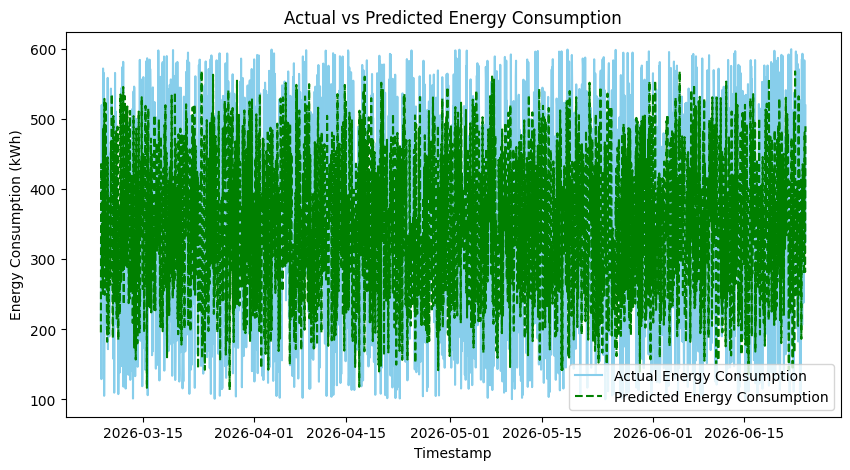

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual Energy Consumption", color="skyblue")
plt.plot(y_test.index, y_pred, label="Predicted Energy Consumption", color="green", linestyle="dashed")
plt.xlabel("Timestamp")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Actual vs Predicted Energy Consumption")
plt.legend()
plt.show()


In [33]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor




In [34]:
# Sample dataset (Replace this with your actual dataset)
data = {
    "voltage": [210, 220, 230, 240, 250, 260, 270, 280, 290, 300],
    "energy_consumption_kWh": [1.1, 1.2, 1.5, 1.7, 1.8, 2.0, 2.3, 2.5, 2.7, 3.0]
}
df = pd.DataFrame(data)



In [ ]:
X = df[["voltage"]]
y = df["energy_consumption_kWh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [36]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [37]:
joblib.dump(model, "energy_forecasting_model.pkl")

print("Model trained and saved successfully!")

Model trained and saved successfully!


In [3]:
from fastapi import FastAPI
import joblib
import pandas as pd


ModuleNotFoundError: No module named 'fastapi'